# Final project: Choice 2

## Integrating functions with infinite derivatives using Romberg integration

See the full project description on Canvas.

In this project you will implement Romberg integration in order to evaluate definite integrals.

Some skeleton code has been included below. The coding should be completed using Algorithm 4.2 from Burden and Faires. This book is available in the library. The details for the book are

* R L Burden, J D Faires and A M Burden. Numerical Analysis. Cengage Learning, 2016. 

  Library Shelf Mark: QA297 BURD

The book is also available as an ebook from the library. A direct link to it is given [here](http://www.vlebooks.com/vleweb/product/openreader?id=QnsBelfast&isbn=9781473737457).

# Python


### Main code for defining the function and the Romberg method

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

####################
# define functions #
####################

# Define a function, y(x), that we wish to integrate
# INPUT 	- x: the point at which the function is evaluated
# OUTPUT	- y: the value of the function

def tfunc1(x):
    y = x**0.25
    return y

def tfunc2(x):
    y = 4 * x**4
    return y

	
##############
#  Main code #
##############

def romberg(func, a, b, n):
    # Initialize R array (n x n)
    R = np.zeros((n, n))
    
    # Step 1: Compute initial h and R[0, 0] using the trapezoidal rule
    h = b - a
    R[0, 0] = (h / 2) * (func(a) + func(b))
    
    # Output first approximation
    print(f"R[0, 0] = {R[0, 0]:.8f}")
    
    # Steps 2 and onwards: Compute the Romberg integration
    for i in range(1, n):
        h /= 2  # Halve the step size
        sum_f = 0
        num_new_points = 2 ** (i - 1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            sum_f += func(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f  # Trapezoidal approximations
        
        # Richardson extrapolation
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4 ** j - 1)
        
        # Output the current row
        print(f"\nRomberg Table after step {i}:")
        for j in range(i + 1):
            print(f"R[{i}, {j}] = {R[i, j]:.8f}")
        
    return R


# Define the interval [a, b] and the number of extrapolations n
a = 0
b = 1
n = 15  # Number of levels in the Romberg integration
exact_value = 4 / 5  # Exact value of the integral from 0 to 1

# Calculate Romberg tables and errors for both functions
print("Computing Romberg Integration for y = x^(1/4):")
R1 = romberg(tfunc1, a, b, n)
errors1 = [abs(R1[i, i] - exact_value) for i in range(n)]

print("\nComputing Romberg Integration for y = 4x^4:")
R2 = romberg(tfunc2, a, b, n)
errors2 = [abs(R2[i, i] - exact_value) for i in range(n)]



Computing Romberg Integration for y = x^(1/4):
R[0, 0] = 0.50000000

Romberg Table after step 1:
R[1, 0] = 0.67044821
R[1, 1] = 0.72726428

Romberg Table after step 2:
R[2, 0] = 0.74465201
R[2, 1] = 0.76938662
R[2, 2] = 0.77219477

Romberg Table after step 3:
R[3, 0] = 0.77650773
R[3, 1] = 0.78712630
R[3, 2] = 0.78830894
R[3, 3] = 0.78856472

Romberg Table after step 4:
R[4, 0] = 0.79006727
R[4, 1] = 0.79458712
R[4, 2] = 0.79508451
R[4, 3] = 0.79519206
R[4, 4] = 0.79521805

Romberg Table after step 5:
R[5, 0] = 0.79580993
R[5, 1] = 0.79772415
R[5, 2] = 0.79793329
R[5, 3] = 0.79797851
R[5, 4] = 0.79798944
R[5, 5] = 0.79799214

Romberg Table after step 6:
R[6, 0] = 0.79823483
R[6, 1] = 0.79904312
R[6, 2] = 0.79913106
R[6, 3] = 0.79915007
R[6, 4] = 0.79915466
R[6, 5] = 0.79915580
R[6, 6] = 0.79915609

Romberg Table after step 7:
R[7, 0] = 0.79925697
R[7, 1] = 0.79959768
R[7, 2] = 0.79963465
R[7, 3] = 0.79964265
R[7, 4] = 0.79964458
R[7, 5] = 0.79964506
R[7, 6] = 0.79964518
R[7, 7] = 0.799

### Error plotting

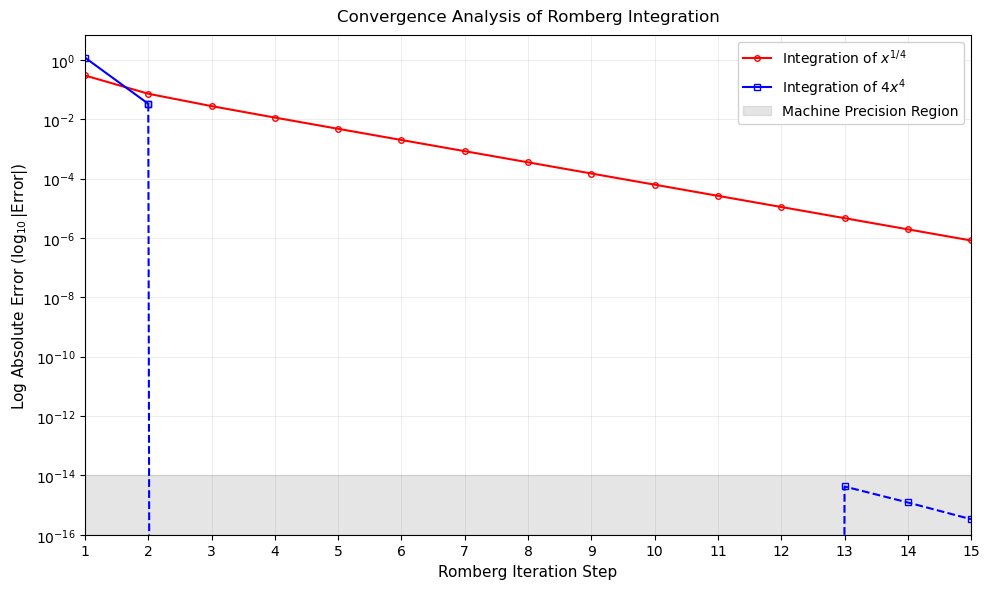

In [2]:
# Initialize figure
plt.figure(figsize=(10, 6))
steps = np.arange(1, n + 1)

# Plot x^(1/4) curve
plt.semilogy(steps, errors1, 'r-', label='Integration of $x^{1/4}$', 
             linewidth=1.5, markersize=4, marker='o', markerfacecolor='none')

# Plot 4x^4 curve with transition at machine precision
cutoff_idx = next((i for i, err in enumerate(errors2) if err < 1e-14), len(errors2))
plt.semilogy(steps[:cutoff_idx], errors2[:cutoff_idx], 'b-',  
             label='Integration of $4x^4$',
             linewidth=1.5, markersize=4, marker='s', markerfacecolor='none')
plt.semilogy(steps[cutoff_idx-1:], errors2[cutoff_idx-1:], 'b--',  
             linewidth=1.5, markersize=4, marker='s', markerfacecolor='none')

# Add machine precision region
plt.fill_between(steps, 1e-16, 1e-14, color='grey', alpha=0.2,
                 label='Machine Precision Region')

# Set labels, title, legend and other stuff to make it look nice and clean
plt.xlabel('Romberg Iteration Step', fontsize=11)
plt.ylabel(r'Log Absolute Error ($\log_{10}|\mathrm{Error}|$)', fontsize=11)
plt.title('Convergence Analysis of Romberg Integration', 
          fontsize=12, pad=10)
plt.grid(True, which='both', linestyle='-', alpha=0.2, color='grey', linewidth=0.5)
plt.xlim(1, n)
plt.ylim(1e-16, 7e0)
plt.xticks(steps)
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)
plt.tight_layout()

plt.savefig('final_project/figure_1.pdf', 
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()




### Emperical Order of Convergence

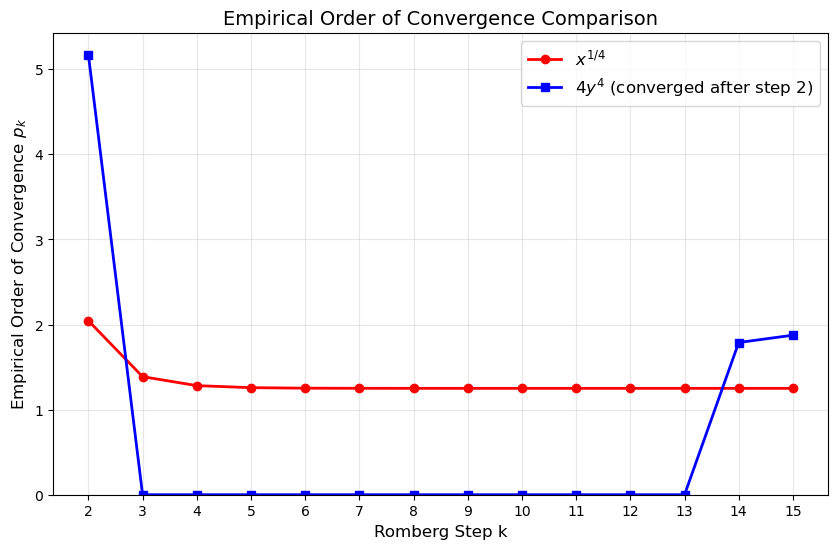

In [3]:
#  p-value calculation
def calculate_p_values(errors):
    p_values = []
    for k in range(1, len(errors)):
        if errors[k] != 0 and errors[k-1] != 0:
            p = np.log(errors[k]/errors[k-1]) / np.log(0.5)
            p_values.append(p)
        else:
            p_values.append(0)  # Set to 0 after convergence
    return np.array(p_values)

# Calculate p values
p_values1 = calculate_p_values(errors1)
p_values2 = calculate_p_values(errors2)

# Create plot
plt.figure(figsize=(10, 6))
k_values = np.arange(2, n+1)

# Plot with masked arrays to show gaps after convergence
plt.plot(k_values, p_values1, 'ro-', label=r'$x^{1/4}$', linewidth=2, markersize=6)
plt.plot(k_values, np.ma.masked_where(errors2[1:] == 0, p_values2), 
         'bs-', label=r'$4y^4$ (converged after step 2)', linewidth=2, markersize=6)

plt.xlabel('Romberg Step k', fontsize=12)
plt.ylabel('Empirical Order of Convergence $p_k$', fontsize=12)
plt.title('Empirical Order of Convergence Comparison', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(bottom=0)
plt.xticks(k_values)

plt.savefig('final_project/figure_2.pdf',
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()



### Testing Romberg iteration alogrthym with Example 1, Pg 213-215 from Burden and Faires (Edition 10)

In [4]:
# NOTE: Verification Block: testing with with the book values from Burden & Faires from that example it has
# NOTE: SCROLL DOWN TO TH E VERY BOTTOM OF THE OUTPUT FROM THIS PLEASE!

# these are pulled from Burden & Faires, Table 4.9 pg 215 (exampel 1!)
book_table = {
    'R11': 0.00000000,
    'R21': 1.57079633,
    'R31': 1.89611890,
    'R41': 1.97423160,
    'R51': 1.99357034,
    'R22': 2.09439511,
    'R32': 2.00455976,
    'R42': 2.00026917,
    'R33': 1.99857073,
    'R43': 1.99998313,
    'R53': 1.99999975,
    'R44': 2.00000555,
    'R54': 2.00000001,
    'R55': 1.99999999
}

def test_sin(x):
    return np.sin(x)

# these are the parameters for the test 
a_test = 0
b_test = np.pi
n_test = 5

# run da Romberg integration
print("\nComputing Romberg Integration for y = sin(x):")
R_test = romberg(test_sin, a_test, b_test, n_test)

# print Romberg table comparison
print("\nComparison with Book's Table 4.9:")
print("================================")
print(f"{'Entry':<8} {'Book Value':<15} {'Our Value':<15} {'Absolute Error':<15}")
print("-" * 55)

# foarmatting for printing entire Romberg table as shown in very very nicely in book (parse this table into report)
for i in range(5):
    for j in range(i+1):
        book_key = f'R{i+1}{j+1}'
        if book_key in book_table:
            our_value = R_test[i,j]
            error = abs(our_value - book_table[book_key])
            print(f"R[{i+1},{j+1}]  {book_table[book_key]:<15.8f} {our_value:<15.8f} {error:<15.2e}")



Computing Romberg Integration for y = sin(x):
R[0, 0] = 0.00000000

Romberg Table after step 1:
R[1, 0] = 1.57079633
R[1, 1] = 2.09439510

Romberg Table after step 2:
R[2, 0] = 1.89611890
R[2, 1] = 2.00455975
R[2, 2] = 1.99857073

Romberg Table after step 3:
R[3, 0] = 1.97423160
R[3, 1] = 2.00026917
R[3, 2] = 1.99998313
R[3, 3] = 2.00000555

Romberg Table after step 4:
R[4, 0] = 1.99357034
R[4, 1] = 2.00001659
R[4, 2] = 1.99999975
R[4, 3] = 2.00000002
R[4, 4] = 1.99999999

Comparison with Book's Table 4.9:
Entry    Book Value      Our Value       Absolute Error 
-------------------------------------------------------
R[1,1]  0.00000000      0.00000000      1.92e-16       
R[2,1]  1.57079633      1.57079633      3.21e-09       
R[2,2]  2.09439511      2.09439510      7.61e-09       
R[3,1]  1.89611890      1.89611890      2.06e-09       
R[3,2]  2.00455976      2.00455975      5.02e-09       
R[3,3]  1.99857073      1.99857073      1.82e-09       
R[4,1]  1.97423160      1.97423160    

### Guass-Jacobi Quadrature Method

In [5]:
import numpy as np
from scipy.special import roots_jacobi
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Function definitions
def func1(t):
    return 0.5 * ((1 + t) / 2) ** 0.25

def func2(t):
    # Since the weight function is already considered, we only need ln((1 + t)/2)
    return np.log((1 + t) / 2)

def gauss_jacobi_quadrature(func, n, alpha=0, beta=0):
    nodes, weights = roots_jacobi(n, alpha, beta)
    return np.sum(weights * func(nodes))

# MAIN

# Exact value for func1
exact_value1 = 4 / 5  # for x^(1/4)

# Compute exact value for func2 using numerical integration
def integrand(x):
    return x ** 0.2 * (1 - x) ** 0.5 * np.log(x)

exact_value2, _ = quad(integrand, 0, 1, limit=1000, epsabs=1e-12)

# Specific points to test
test_points = [5, 10, 15, 20, 25, 30, 40, 50]
results = []

# Constant factor due to variable transformation
alpha = 0.2
beta = 0.5
C = 2 ** (-(alpha + beta + 1))

for n in test_points:
    # For func1 (standard Gauss-Jacobi with alpha=0, beta=0)
    integral1 = gauss_jacobi_quadrature(func1, n)
    error1 = abs(exact_value1 - integral1)

    # For func2 with adjusted alpha and beta
    integral2 = C * gauss_jacobi_quadrature(func2, n, alpha=beta, beta=alpha)
    error2 = abs(exact_value2 - integral2)

    results.append([n, integral1, error1, integral2, error2])

#  a nice table of our results
print("\nConvergence Comparison Table:")
print("=" * 95)
print(f"{'n':>3} | {'x^(1/4) Value':>15} | {'x^(1/4) Error':>12} | {'x^0.2(1-x)^0.5ln(x) Value':>30} | {'Error':>12}")
print("-" * 95)
for n, val1, err1, val2, err2 in results:
    print(f"{n:3d} | {val1:15.12f} | {err1:12.2e} | {val2:30.12f} | {err2:12.2e}")
print("=" * 95)
print(f"Exact: {exact_value1:15.12f} | {'':>12} | {exact_value2:30.12f} |")
print("-" * 95)




Convergence Comparison Table:
  n |   x^(1/4) Value | x^(1/4) Error |      x^0.2(1-x)^0.5ln(x) Value |        Error
-----------------------------------------------------------------------------------------------
  5 |  0.801357954691 |     1.36e-03 |                -0.564355180693 |     7.63e-03
 10 |  0.800267483940 |     2.67e-04 |                -0.570275744802 |     1.71e-03
 15 |  0.800100861892 |     1.01e-04 |                -0.571299900395 |     6.87e-04
 20 |  0.800050108640 |     5.01e-05 |                -0.571631645919 |     3.56e-04
 25 |  0.800029028500 |     2.90e-05 |                -0.571775063535 |     2.12e-04
 30 |  0.800018550612 |     1.86e-05 |                -0.571848476314 |     1.39e-04
 40 |  0.800009128570 |     9.13e-06 |                -0.571916524896 |     7.07e-05
 50 |  0.800005257512 |     5.26e-06 |                -0.571945435643 |     4.18e-05
Exact:  0.800000000000 |              |                -0.571987239695 |
----------------------------------


Computing Romberg Integration for y = x^(1/4):
R[0, 0] = 0.50000000

Computing Romberg Integration for y = x^(0.2)(1-x)^(0.5)ln(x):
R[0, 0] = 0.00000000


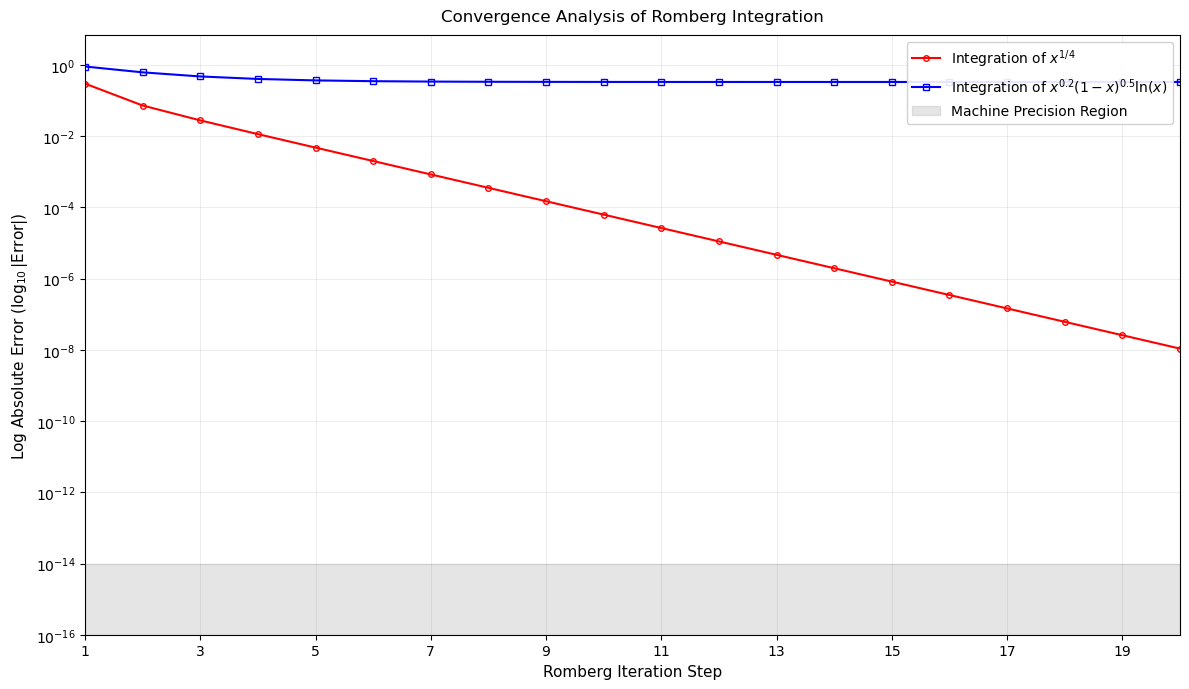

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

####################
# define functions #
####################

def tfunc1(x):
    y = x**0.25
    return y

def tfunc2(x):
    # Handle the case where x=0 (due to ln(x)) <- i need this otherwise plotting doesnt work 
    if x < 1e-15:
        return 0
    return (x**0.2) * ((1-x)**0.5) * np.log(x)

##############
#  Main code #
##############

# this is just same code from above. I used new block so i dont want to mess with previous code that is already working. 
def romberg(func, a, b, n):
    R = np.zeros((n, n))

    h = b - a
    R[0, 0] = (h / 2) * (func(a) + func(b))
    
    print(f"R[0, 0] = {R[0, 0]:.8f}")
    
    for i in range(1, n):
        h /= 2 
        sum_f = 0
        num_new_points = 2 ** (i - 1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            sum_f += func(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f 
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4 ** j - 1)
        
    return R

n = 20  # 20 steps
a1, b1 = 0, 1      # interval for both functions
exact_value1 = 4/5  # Exact value for x^(1/4)
exact_value2 = -0.9053482   # Exact value for x^(0.2)(1-x)^(0.5)ln(x)

# Calculate Romberg tables and errors for both functions
print("\nComputing Romberg Integration for y = x^(1/4):")
R1 = romberg(tfunc1, a1, b1, n)
errors1 = [abs(R1[i, i] - exact_value1) for i in range(n)]

print("\nComputing Romberg Integration for y = x^(0.2)(1-x)^(0.5)ln(x):")
R2 = romberg(tfunc2, a1, b1, n)
errors2 = [abs(R2[i, i] - exact_value2) for i in range(n)]

# Plotting
plt.figure(figsize=(12, 7))
steps = np.arange(1, n + 1)
plt.semilogy(steps, errors1, 'r-', label='Integration of $x^{1/4}$', 
             linewidth=1.5, markersize=4, marker='o', markerfacecolor='none')
plt.semilogy(steps, errors2, 'b-', label='Integration of $x^{0.2}(1-x)^{0.5}\ln(x)$', 
             linewidth=1.5, markersize=4, marker='s', markerfacecolor='none')

# Add machine precision region
plt.fill_between(steps, 1e-16, 1e-14, color='grey', alpha=0.2,
                 label='Machine Precision Region')

plt.xlabel('Romberg Iteration Step', fontsize=11)
plt.ylabel(r'Log Absolute Error ($\log_{10}|\mathrm{Error}|$)', fontsize=11)
plt.title('Convergence Analysis of Romberg Integration', 
          fontsize=12, pad=10)
plt.grid(True, which='both', linestyle='-', alpha=0.2, color='grey', linewidth=0.5)
plt.xlim(1, n)
plt.ylim(1e-16, 7e0)
plt.xticks(steps[::2])
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)
plt.tight_layout()

plt.savefig('final_project/figure_3.pdf', 
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()



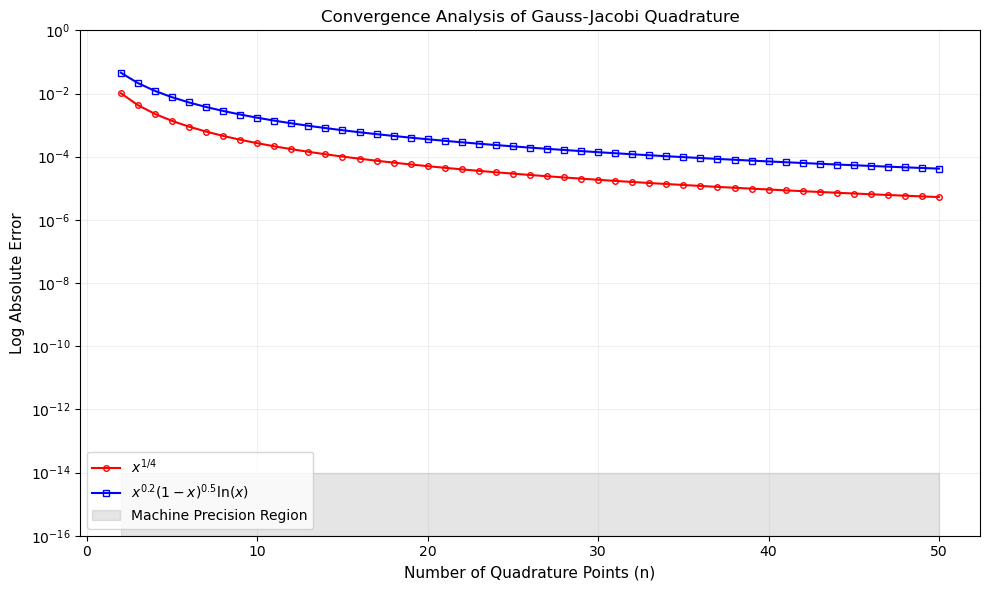

In [6]:
# da plotting
plt.figure(figsize=(10, 6))

quadrature_points = np.arange(2, 51)

# Calculate errors with proper parameters
errors1 = [abs(exact_value1 - gauss_jacobi_quadrature(func1, n)) for n in quadrature_points]

# For func2, include the transformation constant and proper alpha/beta
C = 2 ** (-(alpha + beta + 1))
errors2 = [abs(exact_value2 - C * gauss_jacobi_quadrature(func2, n, alpha=beta, beta=alpha)) 
          for n in quadrature_points]

plt.semilogy(quadrature_points, errors1, 'r-o', label='$x^{1/4}$', 
             linewidth=1.5, markersize=4, markerfacecolor='none')
plt.semilogy(quadrature_points, errors2, 'b-s', 
             label='$x^{0.2}(1-x)^{0.5}\ln(x)$', 
             linewidth=1.5, markersize=4, markerfacecolor='none')

plt.fill_between(quadrature_points, 1e-16, 1e-14, color='grey', alpha=0.2,
                 label='Machine Precision Region')

plt.xlabel('Number of Quadrature Points (n)', fontsize=11)
plt.ylabel('Log Absolute Error', fontsize=11)
plt.title('Convergence Analysis of Gauss-Jacobi Quadrature', fontsize=12)
plt.grid(True, which='both', linestyle='-', alpha=0.2)
plt.legend(loc='lower left', fontsize=10)
plt.ylim(1e-16, 1e0)  # Adjusted y-limits for better visualization
plt.tight_layout()

# Save the plot
plt.savefig('final_project/figure_4.pdf', 
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()


### Shwoing integrant of x^(1/4) and  x^0.2 (1-x)^(0.5) ln(x) when rhomberg integrated 


Computing Romberg Integration for y = x^(1/4):
R[0, 0] = 0.50000000

Computing Romberg Integration for y = x^(0.2)(1-x)^(0.5)ln(x):
R[0, 0] = 0.00000000


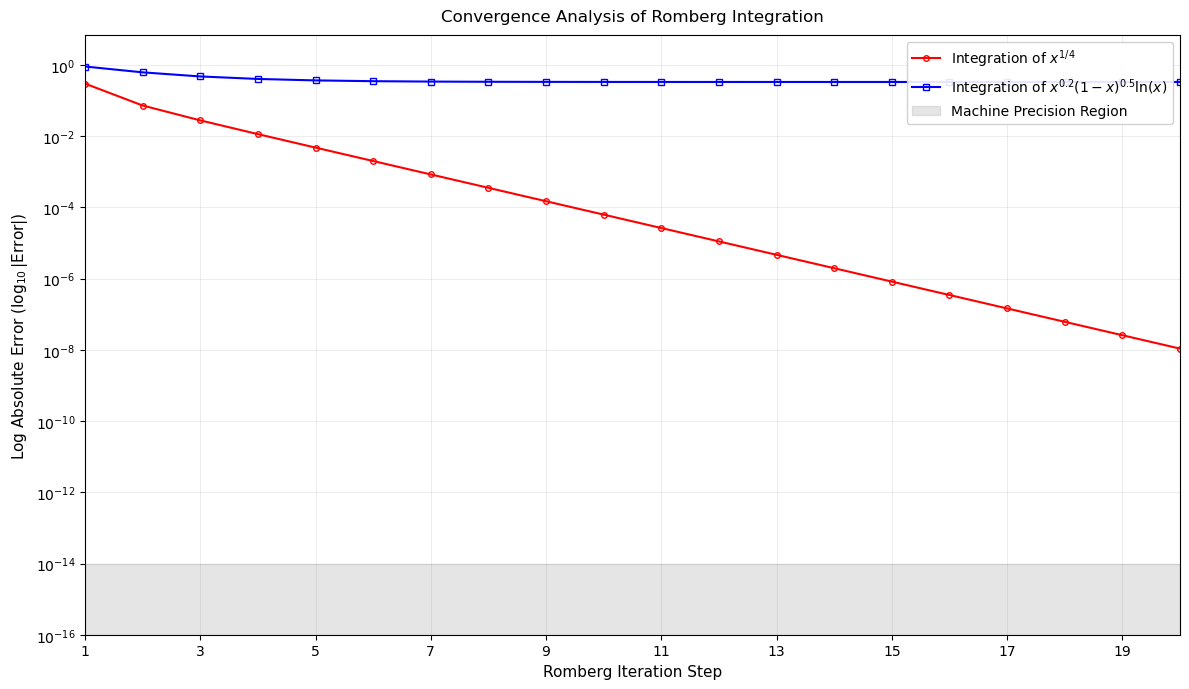

In [7]:
import numpy as np
import matplotlib.pyplot as plt

####################
# define functions #
####################

def tfunc1(x):
    y = x**0.25
    return y

def tfunc2(x):
    # Handle the case where x=0 (due to ln(x)) <- i need this otherwise plotting doesnt work 
    if x < 1e-15:
        return 0
    return (x**0.2) * ((1-x)**0.5) * np.log(x)

##############
#  Main code #
##############

# this is just same code from above. I used new block so i dont want to mess with previous code that is already working. 
def romberg(func, a, b, n):
    R = np.zeros((n, n))

    h = b - a
    R[0, 0] = (h / 2) * (func(a) + func(b))
    
    print(f"R[0, 0] = {R[0, 0]:.8f}")
    
    for i in range(1, n):
        h /= 2 
        sum_f = 0
        num_new_points = 2 ** (i - 1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            sum_f += func(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f 
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4 ** j - 1)
        
    return R

n = 20  # 20 steps
a1, b1 = 0, 1      # interval for both functions
exact_value1 = 4/5  # Exact value for x^(1/4)
exact_value2 = -0.9053482   # Exact value for x^(0.2)(1-x)^(0.5)ln(x)

# Calculate Romberg tables and errors for both functions
print("\nComputing Romberg Integration for y = x^(1/4):")
R1 = romberg(tfunc1, a1, b1, n)
errors1 = [abs(R1[i, i] - exact_value1) for i in range(n)]

print("\nComputing Romberg Integration for y = x^(0.2)(1-x)^(0.5)ln(x):")
R2 = romberg(tfunc2, a1, b1, n)
errors2 = [abs(R2[i, i] - exact_value2) for i in range(n)]

# Plotting
plt.figure(figsize=(12, 7))
steps = np.arange(1, n + 1)
plt.semilogy(steps, errors1, 'r-', label='Integration of $x^{1/4}$', 
             linewidth=1.5, markersize=4, marker='o', markerfacecolor='none')
plt.semilogy(steps, errors2, 'b-', label='Integration of $x^{0.2}(1-x)^{0.5}\ln(x)$', 
             linewidth=1.5, markersize=4, marker='s', markerfacecolor='none')

# Add machine precision region
plt.fill_between(steps, 1e-16, 1e-14, color='grey', alpha=0.2,
                 label='Machine Precision Region')

plt.xlabel('Romberg Iteration Step', fontsize=11)
plt.ylabel(r'Log Absolute Error ($\log_{10}|\mathrm{Error}|$)', fontsize=11)
plt.title('Convergence Analysis of Romberg Integration', 
          fontsize=12, pad=10)
plt.grid(True, which='both', linestyle='-', alpha=0.2, color='grey', linewidth=0.5)
plt.xlim(1, n)
plt.ylim(1e-16, 7e0)
plt.xticks(steps[::2])
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)
plt.tight_layout()

plt.savefig('final_project/figure_3.pdf', 
            bbox_inches='tight', dpi=300, format='pdf')
plt.show()

